# Section 4 - Simple Linear Regression

In [27]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
#Import data
dataset=pd.read_csv(r'../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin=LinearRegression()
y_pred= lin.fit(X_train, y_train).predict(X_test)

In [31]:
y_val= X*lin.coef_[0]+lin.intercept_

y_val=y_val.reshape(1,-1)[0]

cost=np.sum((y-y_val)**2)/len(y_val)
cost

31577311.619426798

In [32]:
#SCORE: Return the coefficient of determination R^2 of the prediction.

print('test_score:',lin.score(X_test,y_test))
print('train_score:',lin.score(X_train, y_train))
print('dataset_score:',lin.score(X, y))

test_score: 0.9749154407708353
train_score: 0.9381900012894278
dataset_score: 0.9565349708076957


In [33]:
lin.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([9345.94244312]),
 '_residues': 737058975.2876911,
 'rank_': 1,
 'singular_': array([11.31733184]),
 'intercept_': 26816.192244031183}

Text(0, 0.5, 'Salary (dollars)')

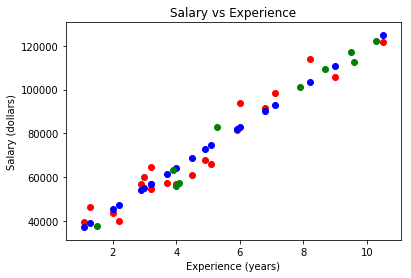

In [34]:
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, lin.predict(X_train), color='blue')
plt.scatter(X_test, y_test, color='green')

plt.title('Salary vs Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (dollars)')

Text(0, 0.5, 'Salary')

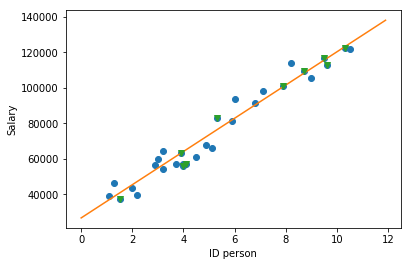

In [35]:
line=np.arange(0,12,0.1)
y_val= line*lin.coef_[0]+lin.intercept_

plt.plot(X,y,'o')
plt.plot(line, y_val)
plt.plot(X_test, y_test, 'v')
plt.xlabel('ID person')
plt.ylabel('Salary')

In [26]:
print(lin.score(X_test, y_test))
SSres=np.sum((y_test-lin.predict(X_test))**2)
SStot=np.sum((y_test-np.mean(y_test)*np.ones(len(y_test)))**2)

R=np.sqrt(1-SSres/SStot)
R

0.9749154407708353


0.9873780637480434

# Section 5 - Multiple Linear Regression

5 methods of building models:
    
 - All-in 
 - Backward Elimination 
 - Forward Selection
 - Bidirectional Elimination
 - Score Comparison

In [103]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
#Import data
dataset=pd.read_csv(r'../../Datasets/Machine_Learning_A_Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [106]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [107]:
# apply OneHotEncoder on categorical feature columns
dataset = ohe.fit_transform(dataset) # It returns an numpy array
dataset=pd.DataFrame(dataset, columns=['C1','C2','C3','R&D Spend', 'Administration', 'Marketing Spend','Profit'])

In [108]:
# #option2 OneHotEnconder (Have to manually select the categotical column)
# LE= LabelEncoder()
# X[:,3]=LE.fit_transform(X[:,3])
# OHE =  OneHotEncoder(categorical_features=[3])
# X=OHE.fit_transform(X).toarray()

In [109]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred=lin.predict(X_test)

print('test_score:',lin.score(X_train, y_train))
print('train_score:',lin.score(X_test, y_test))
print('data_score:',lin.score(X, y))

test_score: 0.9576035764205424
train_score: 0.8752655285748183
data_score: 0.9416843347867802


In [2]:
#Import data
dataset=pd.read_csv(r'../../Datasets/Machine_Learning_A_Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
LE_X=LabelEncoder()
X[:,3]=LE_X.fit_transform(X[:,3])

# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

In [3]:
lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred=lin.predict(X_test)

test_score: 0.9554424095381382
train_score: 0.9118239677528183
data_score: 0.947407556485261


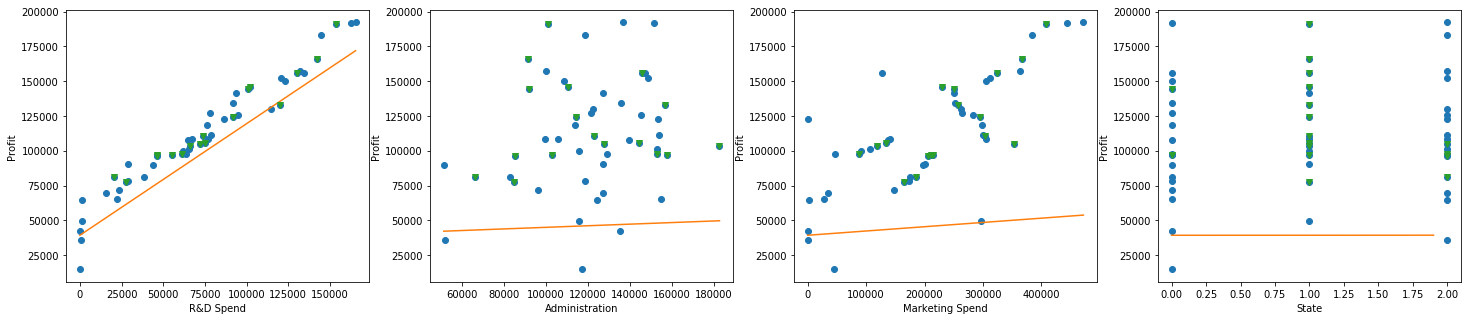

In [5]:
fig, axes= plt.subplots(1,4,figsize=(25,5))

for i,ax in zip(range(0,4),axes):
    line=np.arange(min(X[:,i]),max(X[:,i]),0.1)
    y_val= line*lin.coef_[i]+lin.intercept_
    ax.plot(X[:,i],y,'o')
    ax.plot(line, y_val)
    ax.plot(X_test[:,i], y_test, 'v')
    ax.set_xlabel(dataset.columns[i])
    ax.set_ylabel(dataset.columns[4])

In [ ]:
#Test Fabio : using only column 0

for k in range(0,3):
    X=dataset.iloc[:,k].values.reshape(-1, 1)

    # Splitting training and testing
    from sklearn.model_selection import train_test_split as tts
    X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

    lin=LinearRegression()
    lin.fit(X_train, y_train)
    y_pred=lin.predict(X_test)
    
    print('For the feature:{}'.format(dataset.columns[k]))
    print('test_score:',lin.score(X_train, y_train))
    print('train_score:',lin.score(X_test, y_test))
    print('data_score:',lin.score(X, y),'\n')

# Using Backward Elimination on Regression

    -Select a significance level, say 5% (0.05)
    -Fit a model with all features (variables)
    -Consider the feature with the highest P-Value. If its P-value is greater than significance level (P > SL), go to step 4. Else, your model is ready.
    -Eliminate this feature (variable).
    -Fit a model with the new set of features, and go to step 3.

P value is a statistical measure that helps scientists determine whether or not their hypotheses are correct. P values are used to determine whether the results of their experiment are within the normal range of values for the events being observed. Usually, if the P value of a data set is below a certain pre-determined amount (like, for instance, 0.05), scientists will reject the "null hypothesis" of their experiment - in other words, they'll rule out the hypothesis that the variables of their experiment had no meaningful effect on the results.

The purpose of finding a p-value is basically to determine whether the observed results differ from the expected results to such a degree that the "null hypothesis" - the hypothesis that there is no relationship between the experimental variable(s) and the observed results - is unlikely enough to reject

In [117]:
#Import data
dataset=pd.read_csv(r'../../Datasets/Machine_Learning_A_Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

# apply OneHotEncoder on categorical feature columns
dataset = ohe.fit_transform(dataset) # It returns an numpy array
dataset=pd.DataFrame(dataset, columns=['C1','C2','C3','R&D Spend', 'Administration', 'Marketing Spend','Profit'])

X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [118]:
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm

In [119]:
ones= np.ones(len(X))

In [120]:
# X= np.c_[ np.ones(len(X)), X]

In [121]:
X=np.append(arr=np.ones((len(X),1),dtype=int),values=X,axis=1)

In [82]:
X_opt= X[:,[0,1,2,3,4,5]]

In [84]:
#Ordinary Least Square
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [85]:
vars(reg_OLS)

{'_results': <statsmodels.regression.linear_model.OLSResults at 0x2a901565438>,
 '__doc__': '\n    Results class for for an OLS model.\n\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods that are only available for OLS are:\n\n    - get_influence\n    - outlier_test\n    - el_test\n    - conf_int_el\n\n    See Also\n    --------\n    RegressionResults\n\n    '}

In [87]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.34e-27
Time:                        17:52:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# the index 2 has the biggest p-value
X_opt= X[:,[0,1,3,4,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           8.49e-29
Time:                        17:52:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# the index 1 has the biggest p-value
X_opt= X[:,[0,3,4,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           4.53e-30
Time:                        17:52:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# the index 1 has the biggest p-value
X_opt= X[:,[0,3,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           2.16e-31
Time:                        17:52:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from sklearn.linear_model import LinearRegression

dataset=pd.read_csv(r'../../Datasets/Machine_Learning_A_Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')

X=X_opt

y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred= lin.predict(X_test)

print('test_score:',lin.score(X_test,y_test))
print('train_score:',lin.score(X_train, y_train))
print('dataset_score:',lin.score(X, y))

test_score: 0.9284068707394549
train_score: 0.9544855917548343
dataset_score: 0.9500219138817911


In [63]:
test_score: 0.9576035764205424
train_score: 0.8752655285748183
data_score: 0.9416843347867802

(50, 3)

In [127]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print("the variable {} has SL value of {} which is bigger than 0.05\n".format(j,maxVar))
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

the variable 2 has SL value of 0.989794124160706 which is bigger than 0.05

the variable 1 has SL value of 0.9398329772576751 which is bigger than 0.05

the variable 2 has SL value of 0.6017551078497457 which is bigger than 0.05

the variable 2 has SL value of 0.060030397191130604 which is bigger than 0.05

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.50e-32
Time:                        18:10:52   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                      